![car](car.jpg)

Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-15</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

## Importing Libraries

In [22]:
import pandas as pd
import numpy as np
# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# for logistic regression
from statsmodels.formula.api import logit

In [23]:
df = pd.read_csv('car_insurance.csv')


## Exploring Data

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [25]:
df.describe()

,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,10000.000000,10000.000000,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,1.489500,0.499000,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,1.025278,0.500024,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.000000,0.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,1.000000,0.000000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,1.000000,0.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,2.000000,1.000000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,3.000000,1.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


## Filling in missing values

In [26]:
display(df.isna().sum()/len(df))
display(df.head())

id                     0.0000
age                    0.0000
gender                 0.0000
driving_experience     0.0000
education              0.0000
income                 0.0000
credit_score           0.0982
vehicle_ownership      0.0000
vehicle_year           0.0000
married                0.0000
children               0.0000
postal_code            0.0000
annual_mileage         0.0957
vehicle_type           0.0000
speeding_violations    0.0000
duis                   0.0000
past_accidents         0.0000
outcome                0.0000
dtype: float64

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


### We have missing values in two columns, let's take a look at them to figure out how we will fill in their values.

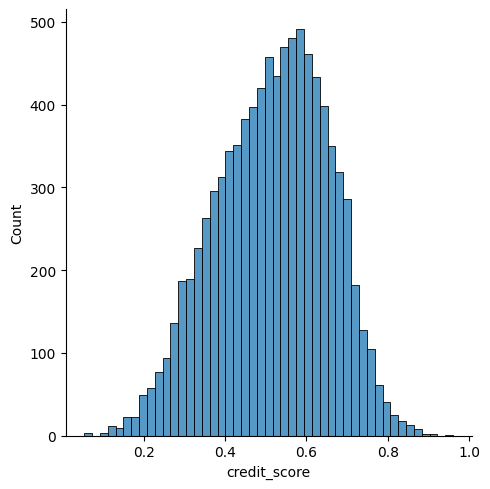

In [27]:
# showing the distribution of the credict_score column
sns.displot(data=df,x='credit_score')
plt.show()

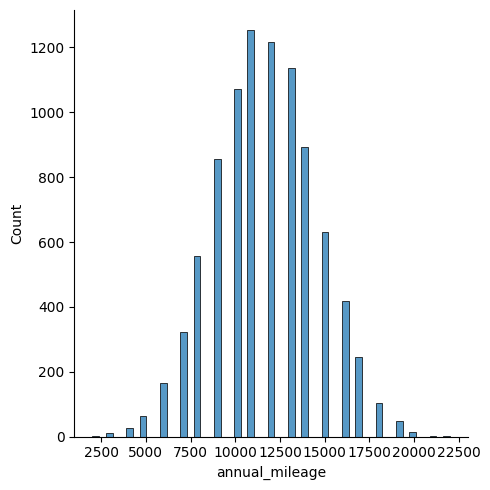

In [28]:
# showing the distribution of the annual_mileage column
sns.displot(data=df,x='annual_mileage')
plt.show()

### Since both columns seem to be normally distributed, we will use the mean of the column to impute upon the missing values.

In [29]:
df["credit_score"].fillna(df["credit_score"].mean(), inplace=True)
df["annual_mileage"].fillna(df["annual_mileage"].mean(), inplace=True)

## Preparing for modeling

In [30]:
# this list will store each model for each respective column
models = []
# all of the columns we will evaluate
features = df.drop(['id','outcome'],axis=1).columns

## Building and storing models

In [31]:
# using a for loop to iterate throug the features and store a model for each one
for feature in features:
    # disp parameter to silence the output
    model = logit(f"outcome~ {feature}", data=df).fit(disp=0)
    models.append(model)

## Measuring preformance

In [32]:
# creating a list to store each models respective accuracy scores
scores = []

# looping through the models list to generate scores for each model
for feature in range(0, len(models)):
    # Compute the confusion matrix
    conf_matrix = models[feature].pred_table()
    # True negatives
    tn = conf_matrix[0,0]
    # True positives
    tp = conf_matrix[1,1]
    # False negatives
    fn = conf_matrix[1,0]
    # False positives
    fp = conf_matrix[0,1]
    # Compute accuracy
    acc = (tn + tp) / (tn + fn + fp + tp)
    scores.append(acc)
scores

[0.7747,
 0.6867,
 0.7771,
 0.6867,
 0.7425,
 0.7054,
 0.7351,
 0.6867,
 0.6867,
 0.6867,
 0.6867,
 0.6904,
 0.6867,
 0.6867,
 0.6867,
 0.6867]

In [33]:
# getting the feature index with the highest score
best_feature = features[scores.index(max(scores))]
# getting the best score
best_score = max(scores)

In [34]:
# Creating the final DataFrame
best_feature_df = pd.DataFrame({'best_feature':best_feature,'best_accuracy':best_score},index=[0])
best_feature_df

,best_feature,best_accuracy
0,driving_experience,0.7771
